In [ ]:
!pip install pydub==0.25.1 nnAudio==0.3.1 torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 yolov5==5.0.10

In [3]:
!git clone https://github.com/RedbirdTaiwan/silic

Cloning into 'silic'...
remote: Enumerating objects: 362, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 362 (delta 23), reused 31 (delta 14), pack-reused 318
Receiving objects: 100% (362/362), 246.62 MiB | 28.90 MiB/s, done.
Resolving deltas: 100% (177/177), done.
Checking out files: 100% (24/24), done.


In [4]:
%cd 'silic'
!git pull
import pandas as pd, silic
from IPython.display import Image
from google.colab import files

/content/silic
Already up to date.


/usr/local/lib/python3.7/dist-packages/nnAudio/Spectrogram.py:7: Warning: importing Spectrogram subpackage will be deprecated soon. You should import the feature extractor from the feature subpackage. See actual documentation.
  category=Warning,


In [5]:
model = silic.Silic()
model.audio('sample/49593.mp3')

STFT kernels created, time used = 0.1869 seconds
STFT kernels created, time used = 0.1802 seconds
STFT filter created, time used = 0.0041 seconds
Mel filter created, time used = 0.0047 seconds
Origional audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s


Spectrogram was saved to sample/linear/49593.jpg.


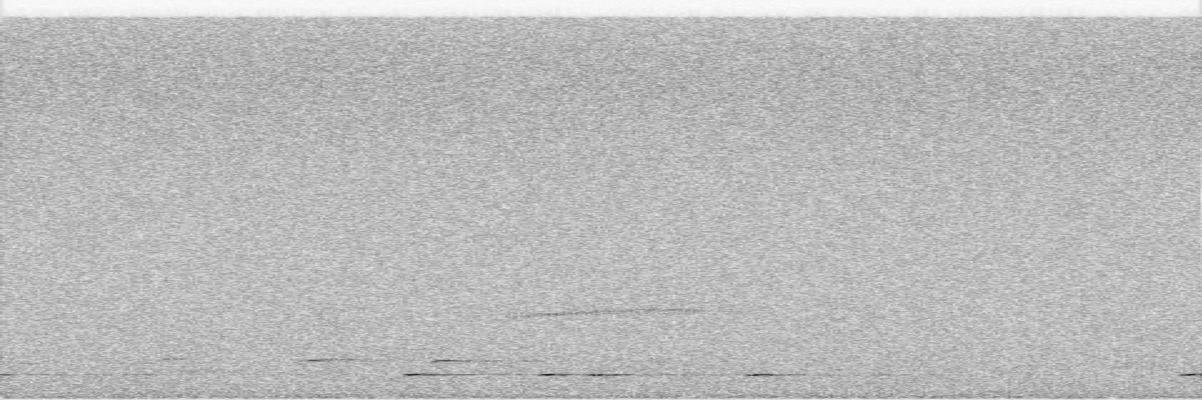

In [6]:
spect_linear = model.tfr()
Image(spect_linear)

Spectrogram was saved to sample/mel/49593.jpg.


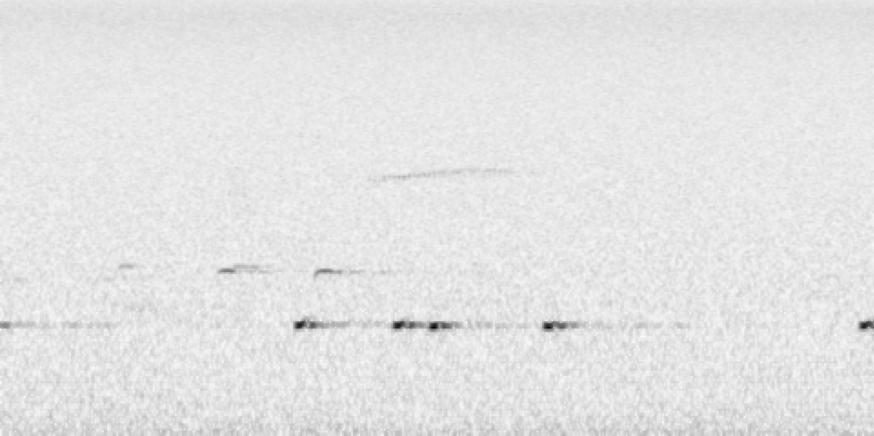

In [7]:
spect_mel = model.tfr(spect_type='mel')
Image(spect_mel)

Spectrogram was saved to sample/rainbow/49593.jpg.


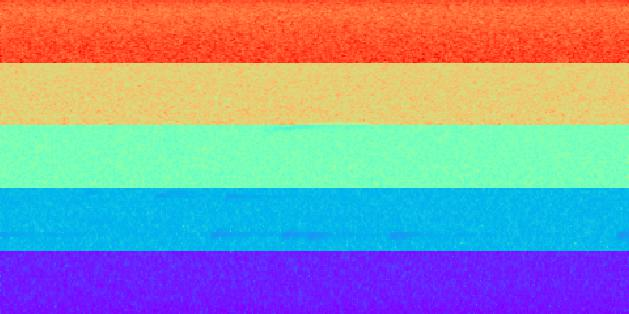

In [8]:
spect_rainbow = model.tfr(spect_type='rainbow')
Image(spect_rainbow)

In [9]:
"""
What is weights?
The weight is the kernel of SILIC and will be update after the SILIC is retrain/reinforcement.
Users can choose any version or use the latest version, i.e. higher number.
Users can find all models released in the folder "model"

What is step?
In SILIC, each detect is applied on a 3s audio.
When a recording is longer than 3s, users can choose a duration for the use of moving window
For example, when using step=1000, multiple 3s-clips will be cut every 1000ms, such as a 6s recording will be split into 4 clips: 0-3s, 1-4s, 2-5s and 3-6s

What is targetclasses?
Users can setup targetclasses to focus on the sounds interest, a smaller targetclasses can speed up computing process. 
Use targetclasses=[] can detect all sound classes in the SILIC.
All the class ID can be found in model/expXX/soundclass.csv

What is conf_thres?
The SILIC will provide confidence score (between 0 and 1) for each detect.
Users can choose a threshold of confidence score (conf_thres) to filter out detects with scores lower than conf_thres.
A biger conf_thres can speed up computing process and increase the precision but decrease the recall.
"""
# labels = model.detect(weights='model/exp20/best.pt', step=1000, targetclasses=[66,101], conf_thres=0.1)
labels = model.detect(weights='model/exp20/best.pt', step=1000, targetclasses=[], conf_thres=0.1)

Spectrogram was saved to sample/rainbow/49593.jpg.


In [10]:
df = pd.DataFrame(labels[1:],columns=labels[0])
df = df.sort_values('time_begin')
print(df)

               file  classid species_name sound_class     scientific_name  \
1  sample/49593.mp3      101         黃嘴角鴞        S-01  Otus spilocephalus   
0  sample/49593.mp3      101         黃嘴角鴞        S-01  Otus spilocephalus   
3  sample/49593.mp3      101         黃嘴角鴞        S-01  Otus spilocephalus   
4  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
2  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
6  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
5  sample/49593.mp3      101         黃嘴角鴞        S-01  Otus spilocephalus   
8  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
7  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   

   time_begin  time_end  freq_low  freq_high  score  
1           0       984      1364       1703  0.281  
0         774      2083      1384       1772  0.146  
3        1430      2796      1364       1749  0.144  
4        1994

In [11]:
# This process is used to merge the labels overlapped
newlabels = silic.clean_multi_boxes(labels)
print(newlabels)

               file  classid species_name sound_class     scientific_name  \
0  sample/49593.mp3      101         黃嘴角鴞        S-01  Otus spilocephalus   
1  sample/49593.mp3      101         黃嘴角鴞        S-01  Otus spilocephalus   
2  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
3  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
4  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   

   time_begin  time_end  freq_low  freq_high  score  
0           0       984      1364       1703  0.281  
1         774      2796      1326       1772  0.165  
2        1994      3089       810       1196  0.685  
3        3000      3946       796       1196  0.697  
4        5876      6000       740       1196  0.254  


In [12]:
label_img = silic.draw_labels(model, newlabels)

Spectrogram was saved to sample/linear/49593.jpg.
sample/labels/49593.jpg saved


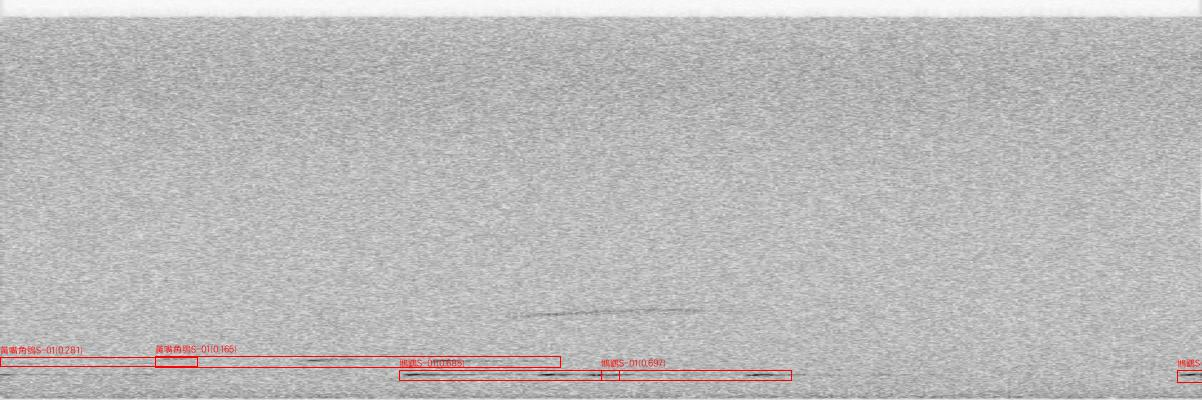

In [13]:
Image(label_img)

In [15]:
# This function can package all the audios, detections and spectrograms of detections for using a www browser to review
silic.browser('/content/silic/sample', weights='model/exp20/best.pt', step=1000, targetclasses=[], conf_thres=0.1)

STFT kernels created, time used = 0.1901 seconds
STFT kernels created, time used = 0.1758 seconds
STFT filter created, time used = 0.0053 seconds
Mel filter created, time used = 0.0054 seconds
8 files found.
Origional audio: channel = 2, sample_rate = 44100 Hz, sample_size = 1388544, duration = 15.74312925170068 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 503780, duration = 15.743125 s
Spectrogram was saved to result_silic/linear/SILIC-demo.png.
Spectrogram was saved to result_silic/rainbow/SILIC-demo.png.
49 sounds of 10 species is/are found in /content/silic/sample/SILIC-demo.mp4
Origional audio: channel = 1, sample_rate = 32000 Hz, sample_size = 9600058, duration = 300.0018125 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 9600058, duration = 300.0018125 s
Spectrogram was saved to result_silic/linear/11794.png.
Spectrogram was saved to result_silic/rainbow/11794.png.
620 sounds of 23 species is/are found in /content/silic/sample/1

In [ ]:
files.download('result_silic.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>